In [143]:
!pip install mlxtend

In [144]:
import pandas as pd

df = pd.read_csv('CustomerSurvey02.csv')

In [145]:
df.head(5)

,Unnamed: 0,ประทับเวลา,Transaction,Mountain_Bike,Collagen,Brownie,Botox,Weed,Hemp,Blood_pressure_meter,RGB_lightblub,bikini_wax_course,eletronic_massaging_chair,Room_plants,side_pillow,weighing_apparatus,jawline_botox_course,curry_puff,Lego,Fan,Traditional_thai_whisky,Sexy_pajamas,Dumbell,vaccum_robot,Wagyu_meat,sun_dried_pork,drone,See-through shirt,Tarot_card,Grilled_beef,paper_shredder,bag,Shabu,Surfskate,Board game,Omakase,Cashew_nuts,automatic_light,Battalion,Dyson_hairdryer,gramophone_record,Nose_hair_scissors,PS5,Blood_glucose_meter,Roti,Pickled_Shrimp_Paste,Thailand_travel_package,FIFA_Online_game,Baby_Mango,automatic_cat_toilet,chanel_bag,Rice-with-Pork-Leg-&-Hoof-Stewed,Cordyceps,health-pillow-for-Insomnia,Dedoo_orangejuice,authorized_Software,Sunscreen
0,20/3/2021,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,20/3/2021,11:54:01,2,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย
2,20/3/2021,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย
3,20/3/2021,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,20/3/2021,11:54:18,5,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย


In [146]:
missing = df.isnull().sum()
print(missing)

Unnamed: 0                          0
ประทับเวลา                          0
Transaction                         0
Mountain_Bike                       0
Collagen                            0
Brownie                             0
Botox                               0
Weed                                0
Hemp                                0
Blood_pressure_meter                0
RGB_lightblub                       0
bikini_wax_course                   0
eletronic_massaging_chair           0
Room_plants                         0
side_pillow                         0
weighing_apparatus                  0
jawline_botox_course                0
curry_puff                          0
Lego                                0
Fan                                 0
Traditional_thai_whisky             0
Sexy_pajamas                        0
Dumbell                             0
vaccum_robot                        0
Wagyu_meat                          0
sun_dried_pork                      1
drone       

In [147]:
x = pd.DataFrame(columns=["Transaction","item"])
# x = pd.DataFrame({"Transaction":["0"],"item":["hello","hi"]})

In [148]:
dict_x = {"Transaction":[],"item":[]}

In [149]:
itemName = []
for col in df.columns:
    itemName.append(col)
    #print(col)
    for i in df[col].items():
        if i[1] == 'เคย':
#             print(i[0] -1)
            transID = i[0] +1
#             print({"Transaction":[transID],"item":[col]})
            new = pd.DataFrame({"Transaction":[transID],"item":[col]})
            #print(new)
            dict_x['Transaction'].append(transID)
            dict_x['item'].append(col)
#             x.append(new, ignore_index = True)

            #print(i[0])
# print(dict_x)
df = pd.DataFrame(dict_x)
print(df)

     Transaction           item
0              3  Mountain_Bike
1              6  Mountain_Bike
2             11  Mountain_Bike
3             13  Mountain_Bike
4             16  Mountain_Bike
..           ...            ...
969           40      Sunscreen
970           41      Sunscreen
971           42      Sunscreen
972           43      Sunscreen
973           44      Sunscreen

[974 rows x 2 columns]


In [150]:
df.item.unique()

array(['Mountain_Bike', 'Collagen', 'Brownie', 'Botox', 'Weed', 'Hemp',
       'Blood_pressure_meter', 'RGB_lightblub', 'bikini_wax_course',
       'eletronic_massaging_chair', 'Room_plants', 'side_pillow',
       'weighing_apparatus', 'jawline_botox_course', 'curry_puff', 'Lego',
       'Fan', 'Traditional_thai_whisky', 'Sexy_pajamas', 'Dumbell',
       'vaccum_robot', 'Wagyu_meat', 'sun_dried_pork', 'drone',
       'See-through shirt', 'Tarot_card', 'Grilled_beef',
       'paper_shredder', 'bag', 'Shabu', 'Surfskate', 'Board game',
       'Omakase', 'Cashew_nuts', 'automatic_light', 'Battalion',
       'Dyson_hairdryer', 'gramophone_record', 'Nose_hair_scissors',
       'PS5', 'Blood_glucose_meter', 'Roti', 'Pickled_Shrimp_Paste',
       'Thailand_travel_package', 'FIFA_Online_game', 'Baby_Mango',
       'automatic_cat_toilet', 'chanel_bag',
       'Rice-with-Pork-Leg-&-Hoof-Stewed', 'Cordyceps',
       'health-pillow-for-Insomnia', 'Dedoo_orangejuice',
       'authorized_Software', 

In [151]:
df.loc[df["item"]=='NONE'].shape[0]

df = df[df["item"] != 'NONE']

In [152]:
df_for_top10_Items

bag                    44
Sunscreen              44
Shabu                  44
Roti                   42
curry_puff             41
Cashew_nuts            40
side_pillow            38
Fan                    36
sun_dried_pork         35
authorized_Software    34
Name: item, dtype: int64

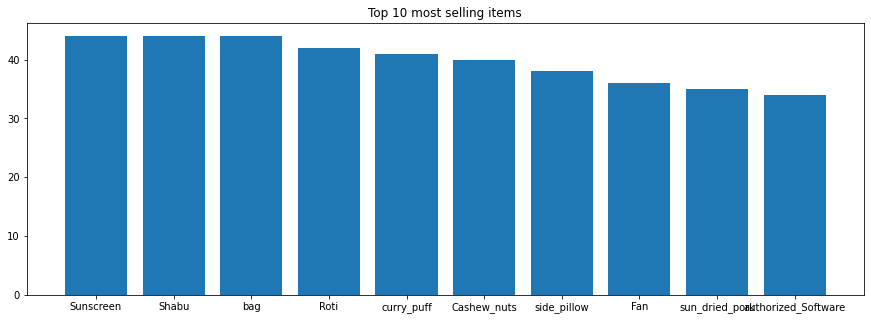

In [153]:
import numpy as np
import matplotlib.pyplot as plt

df_for_top10_Items=df['item'].value_counts().head(10)
Item_array= np.arange(len(df_for_top10_Items))
#print(df_for_top10_Items)
plt.figure(figsize=(15,5))
Items_name= ['Sunscreen','Shabu','bag','Roti','curry_puff','Cashew_nuts','side_pillow','Fan','sun_dried_pork','authorized_Software']
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()


In [154]:
hot_encoded_df=df.groupby(['Transaction','item'])['item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [155]:
hot_encoded_df.head(5)

item,Baby_Mango,Battalion,Blood_glucose_meter,Blood_pressure_meter,Board game,Botox,Brownie,Cashew_nuts,Collagen,Cordyceps,Dedoo_orangejuice,Dumbell,Dyson_hairdryer,FIFA_Online_game,Fan,Grilled_beef,Hemp,Lego,Mountain_Bike,Nose_hair_scissors,Omakase,PS5,Pickled_Shrimp_Paste,RGB_lightblub,Rice-with-Pork-Leg-&-Hoof-Stewed,Room_plants,Roti,See-through shirt,Sexy_pajamas,Shabu,Sunscreen,Surfskate,Tarot_card,Thailand_travel_package,Traditional_thai_whisky,Wagyu_meat,Weed,authorized_Software,automatic_cat_toilet,automatic_light,bag,bikini_wax_course,chanel_bag,curry_puff,drone,eletronic_massaging_chair,gramophone_record,health-pillow-for-Insomnia,jawline_botox_course,paper_shredder,side_pillow,sun_dried_pork,vaccum_robot,weighing_apparatus
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [156]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [157]:
print(hot_encoded_df)

item         Baby_Mango  Battalion  ...  vaccum_robot  weighing_apparatus
Transaction                         ...                                  
1                     0          0  ...             1                   0
2                     1          0  ...             1                   1
3                     1          1  ...             0                   1
4                     0          1  ...             1                   1
5                     0          0  ...             1                   0
6                     1          0  ...             1                   1
7                     1          0  ...             0                   0
8                     0          0  ...             1                   1
9                     0          0  ...             1                   1
10                    1          0  ...             0                   0
11                    1          0  ...             0                   0
12                    0          0  ..

In [158]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Shabu),(Cashew_nuts),1.000000,0.909091,0.909091,0.909091,1.000000,0.000000,1.000000
1,(Cashew_nuts),(Shabu),0.909091,1.000000,0.909091,1.000000,1.000000,0.000000,inf
2,(Sunscreen),(Cashew_nuts),1.000000,0.909091,0.909091,0.909091,1.000000,0.000000,1.000000
3,(Cashew_nuts),(Sunscreen),0.909091,1.000000,0.909091,1.000000,1.000000,0.000000,inf
4,(bag),(Cashew_nuts),1.000000,0.909091,0.909091,0.909091,1.000000,0.000000,1.000000
5,(Cashew_nuts),(bag),0.909091,1.000000,0.909091,1.000000,1.000000,0.000000,inf
6,(Shabu),(Roti),1.000000,0.954545,0.954545,0.954545,1.000000,0.000000,1.000000
7,(Roti),(Shabu),0.954545,1.000000,0.954545,1.000000,1.000000,0.000000,inf
8,(Sunscreen),(Roti),1.000000,0.954545,0.954545,0.954545,1.000000,0.000000,1.000000
9,(Roti),(Sunscreen),0.954545,1.000000,0.954545,1.000000,1.000000,0.000000,inf


In [159]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.9, use_colnames=True)

In [160]:
frequent_itemsets

,support,itemsets
0,0.909091,(Cashew_nuts)
1,0.954545,(Roti)
2,1.000000,(Shabu)
3,1.000000,(Sunscreen)
4,1.000000,(bag)
5,0.931818,(curry_puff)
6,0.909091,"(Shabu, Cashew_nuts)"
7,0.909091,"(Sunscreen, Cashew_nuts)"
8,0.909091,"(bag, Cashew_nuts)"
9,0.954545,"(Shabu, Roti)"


In [161]:
rules[ (rules['lift'] >= 1.15) &
       (rules['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


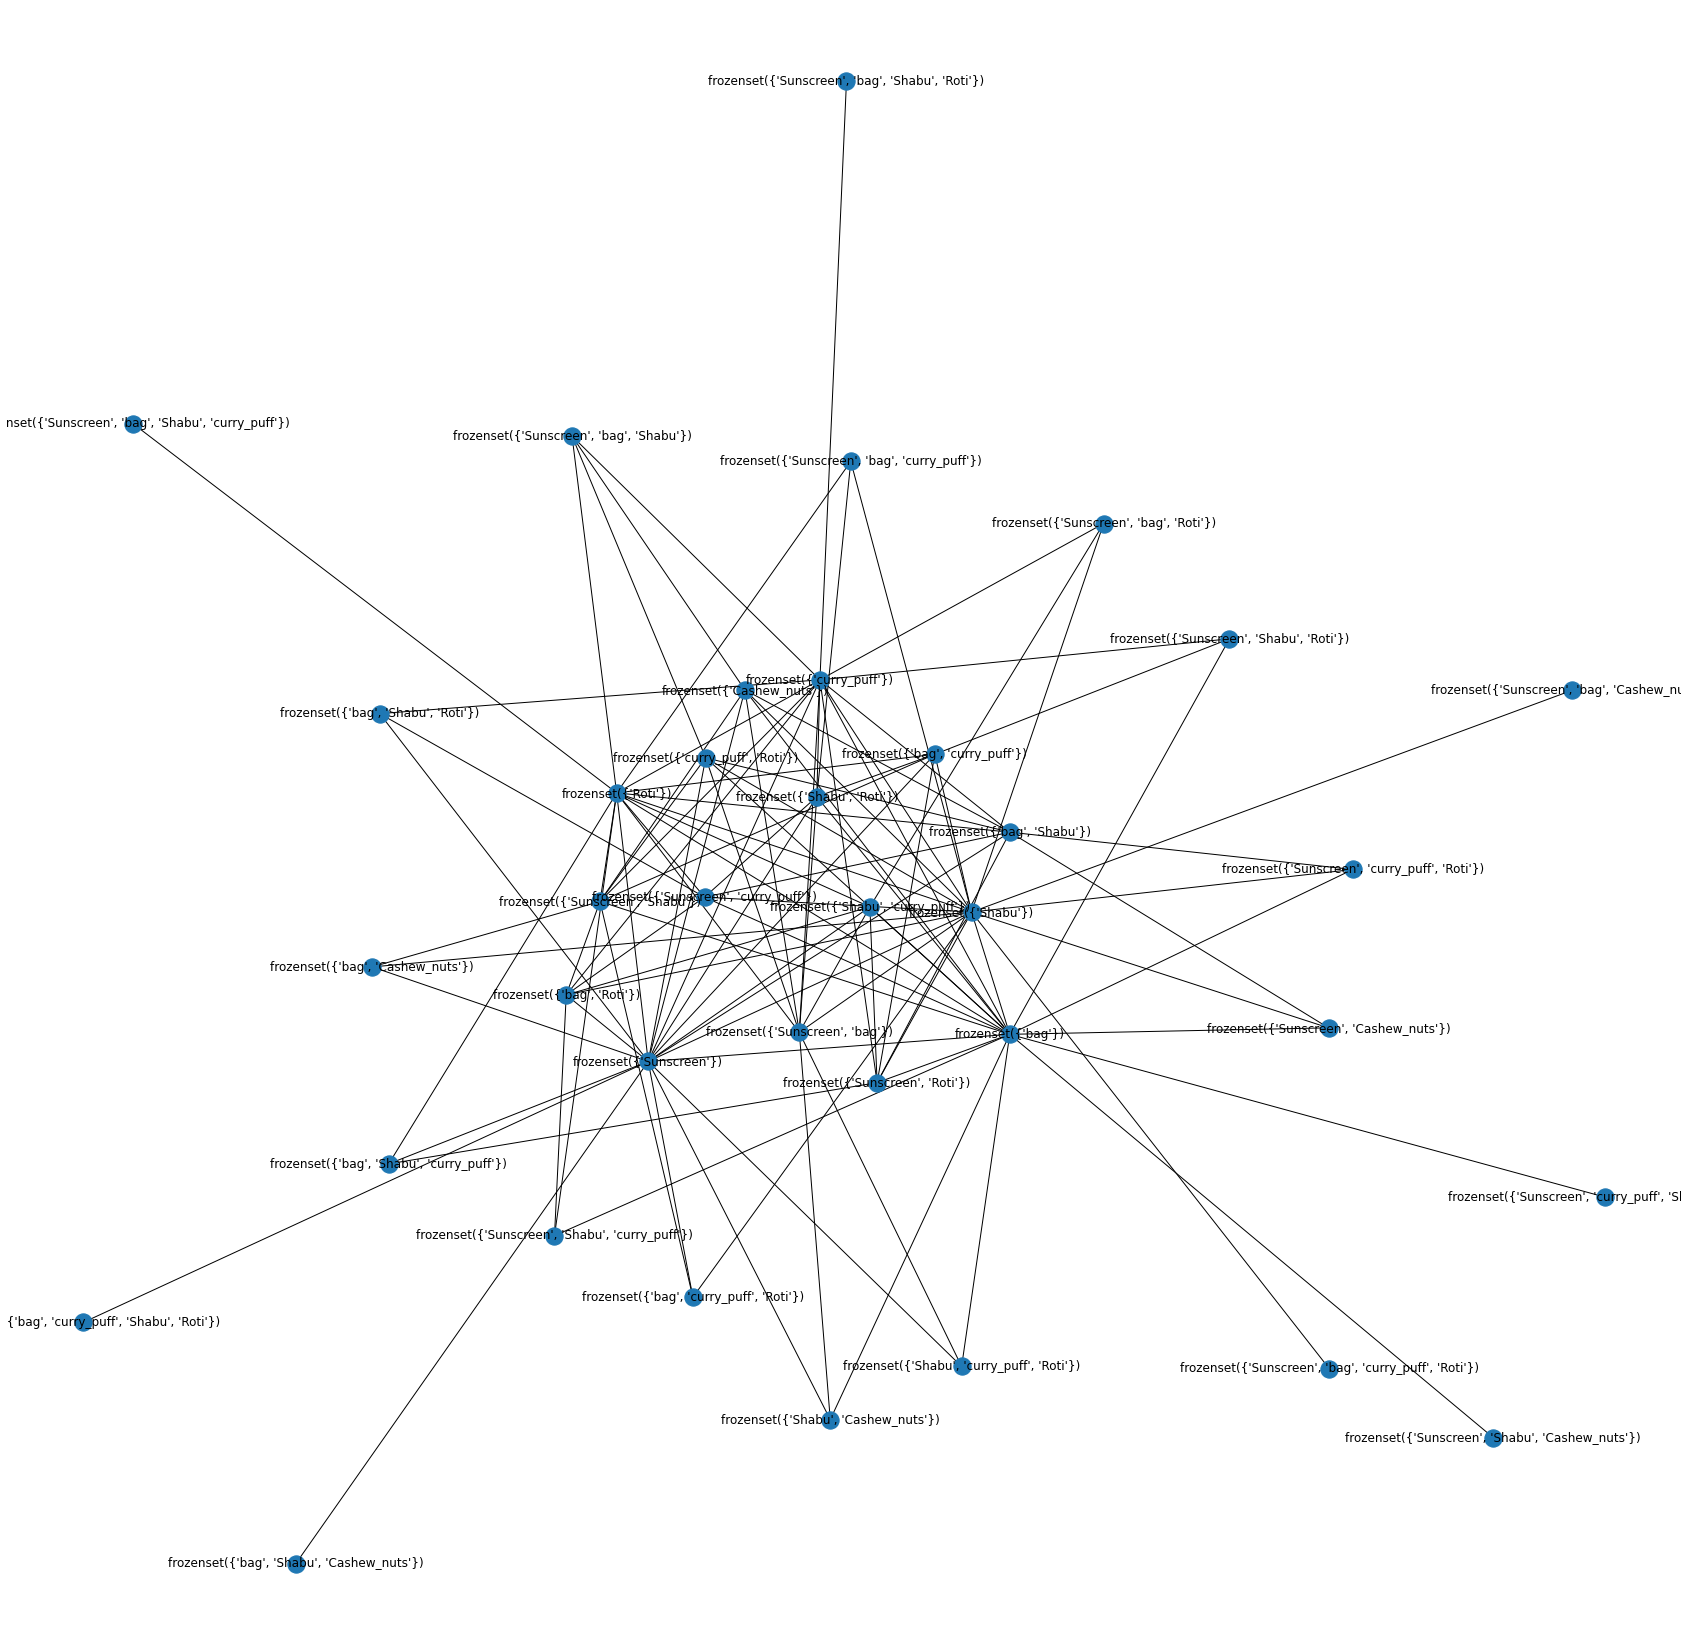

In [168]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(30,30))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [163]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [164]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [165]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [166]:
links_filtered=links.loc[ (links['value'] > 0.8) & 
                         (links['item'] != links['related item']) ]

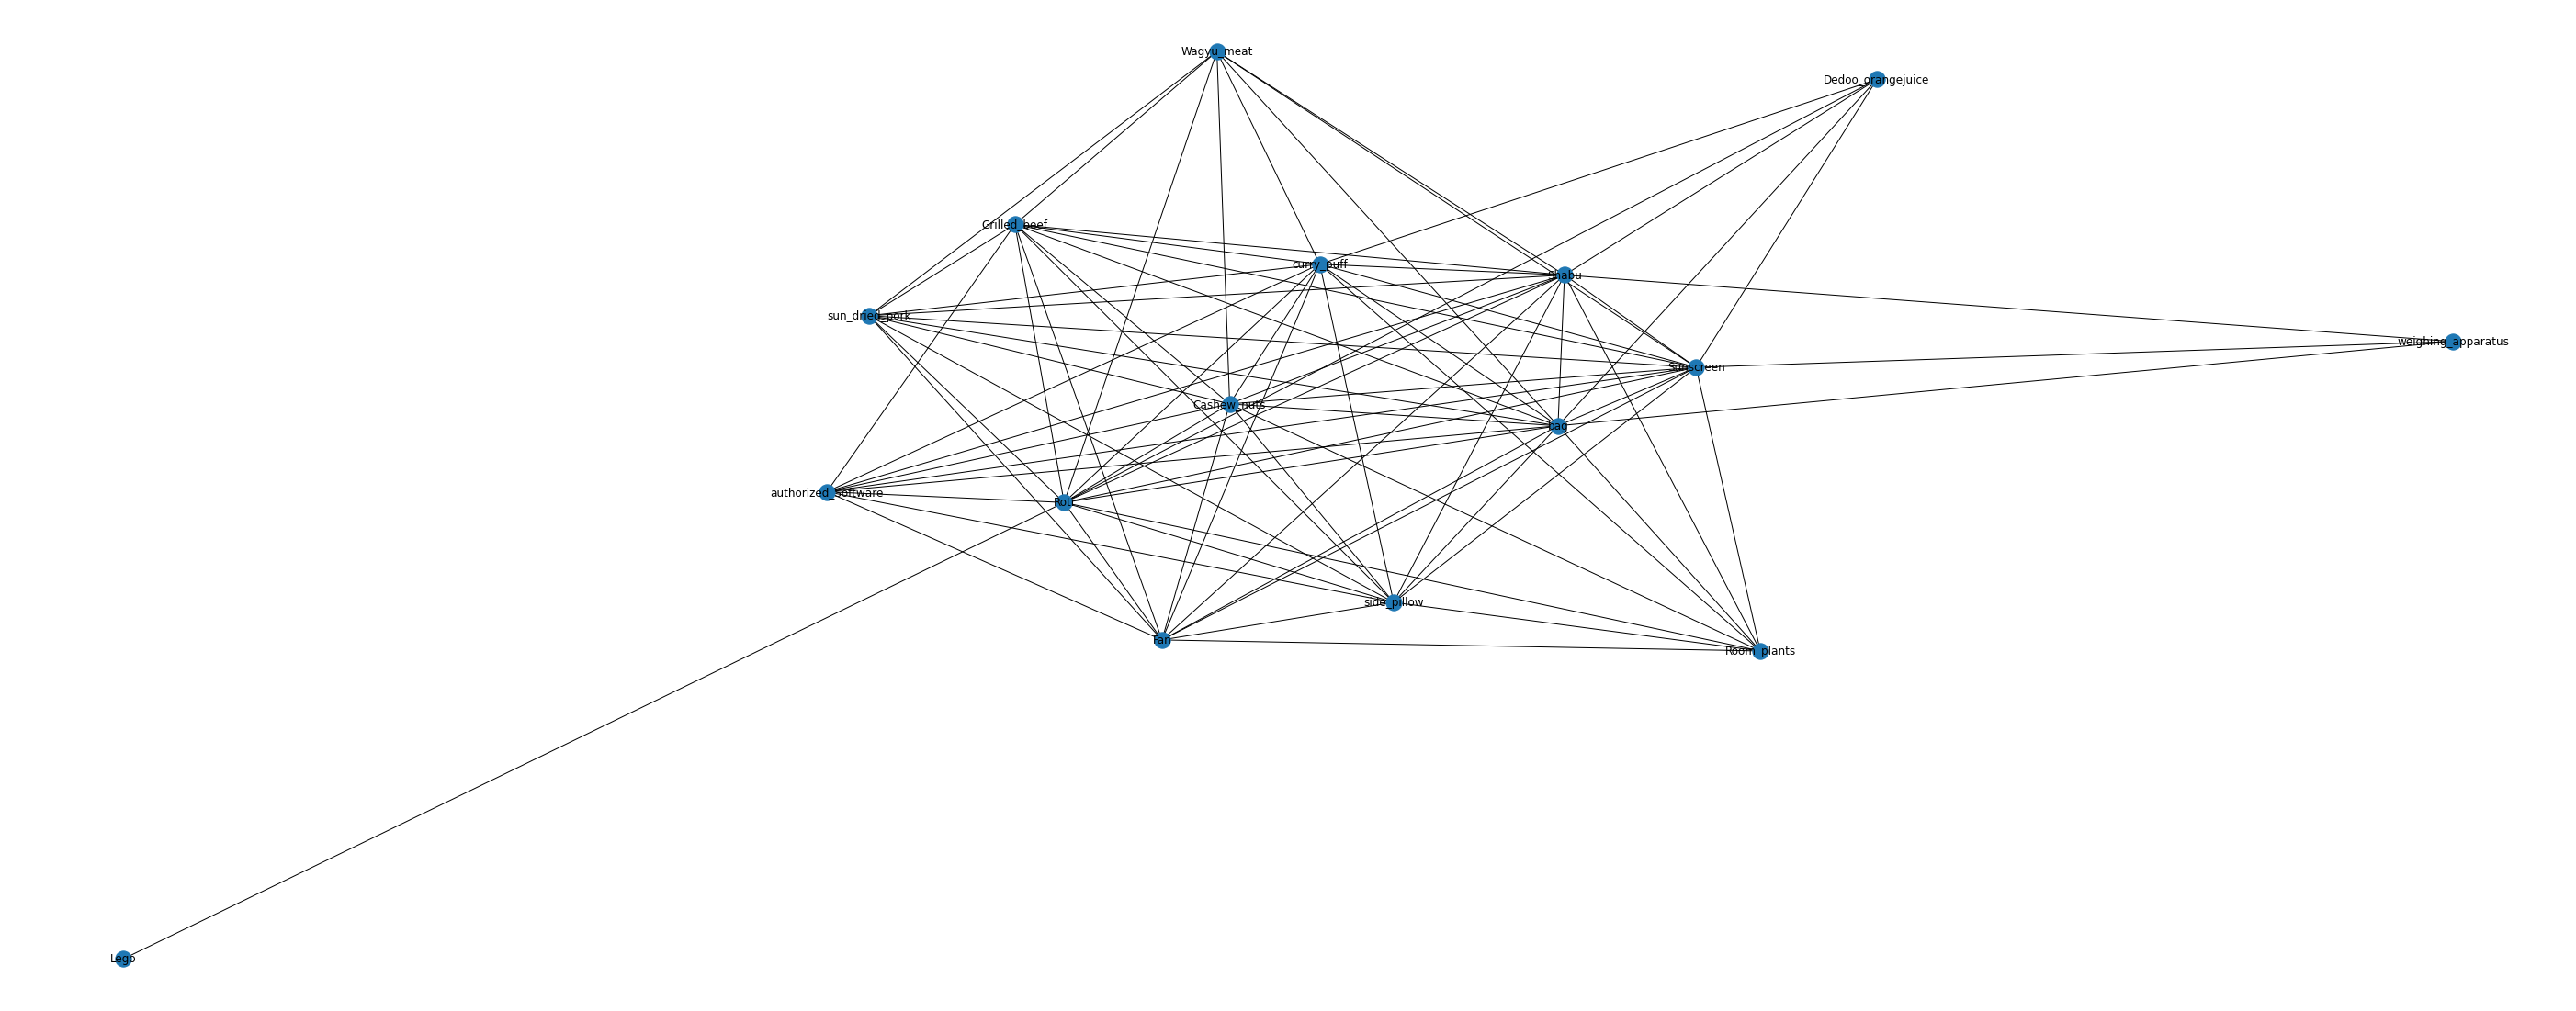

In [167]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(50,20))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()